In [2]:
!pip install numpy pandas scikit-learn mlxtend plotly faker



In [35]:
import pandas as pd
import random
from faker import Faker

fake = Faker()
Health_conditions_list = [
    'Hypertension', 'Diabetes', 'Obesity', 'High Cholesterol', 'High Blood Pressure', 
    'Kidney Disease', 'Atherosclerosis', 'Genetic Mutations', 'Asthma', 'Allergies', 'Sleep Apnea'
]

data = []
for _ in range(1000):
    patient_id = fake.random_int(min=1, max=1000)
    num_conditions = random.randint(1, 4)
    conditions = random.sample(Health_conditions_list, num_conditions)
    data.append({'Patient_ID': patient_id, 'Conditions': ', '.join(conditions)})
df = pd.DataFrame(data)
df.head()


,Patient_ID,Conditions
0,147,"Genetic Mutations, Hypertension, Obesity, Diab..."
1,151,"Asthma, Kidney Disease, Hypertension, High Cho..."
2,482,Diabetes
3,588,High Cholesterol
4,956,"Genetic Mutations, Allergies, Sleep Apnea"


   Patient_ID                                         Conditions  Cluster
0         147  Genetic Mutations, Hypertension, Obesity, Diab...        1
1         151  Asthma, Kidney Disease, Hypertension, High Cho...        0
2         482                                           Diabetes        1
3         588                                   High Cholesterol        0
4         956          Genetic Mutations, Allergies, Sleep Apnea        0


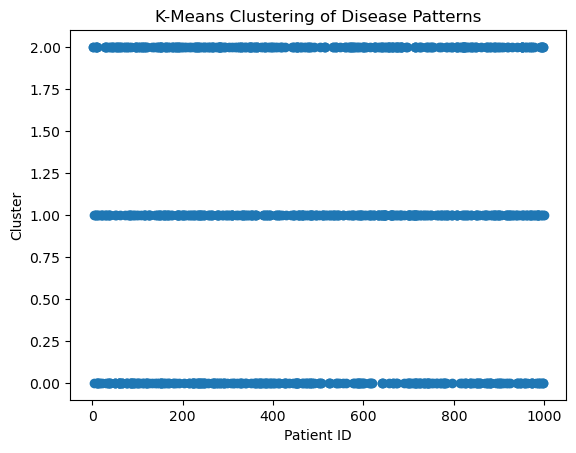

In [36]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Convert conditions into lists
df['Health_Conditions_List'] = df['Conditions'].apply(lambda x: x.split(', '))

# One-hot encoding of conditions
mlb = MultiLabelBinarizer()
onehot_conditions = mlb.fit_transform(df['Health_Conditions_List'])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(onehot_conditions)

print(df[['Patient_ID', 'Conditions', 'Cluster']].head())

# Visualize clustering with a 2D plot (for simplicity)
plt.scatter(df['Patient_ID'], df['Cluster'])
plt.title("K-Means Clustering of Disease Patterns")
plt.xlabel('Patient ID')
plt.ylabel('Cluster')
plt.show()


In [37]:
from mlxtend.frequent_patterns import apriori, association_rules

# Convert one-hot encoded DataFrame to boolean
df_onehot_bool = df_onehot.astype(bool)

# Apply the Apriori algorithm with the correct data format
frequent_itemsets = apriori(df_onehot_bool, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
print(rules)


Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


In [38]:
import plotly.express as px

# Use column names or indices for x, y, z
fig = px.scatter_3d(
    df_onehot, 
    x=df_onehot.columns[0],  # First column (replace with specific column name if needed)
    y=df_onehot.columns[1],  # Second column
    z=df_onehot.columns[2],  # Third column
    color=df['Cluster'],  # Assuming 'Cluster' column exists
    hover_data=['Diabetes', 'High Blood Pressure', 'Obesity']  # Use actual existing columns
)

fig.update_layout(title="3D Visualization of Disease Patterns Clusters")
fig.show()
